In [29]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [30]:
def exponential(l):
    u = random.random()
    return -math.log(u)/l

In [31]:
lambda_a = 15
lambda_d = 8
n_of_tasks=1000

In [32]:
tasks=[]
for i in range(n_of_tasks):
    tasks.append(exponential(lambda_a))

In [33]:
task_id=0
task_t=tasks[task_id]
t=0
queue=[]
queue.append(t)
serwer_t=exponential(lambda_d)  
executed=0
tasks_in_queue=[]
time_waited=[]
executed_tasks=[]
tasks_in_queue.append([t,len(queue)])

while(executed<n_of_tasks):
    if(task_t<=0 and task_id<n_of_tasks-1):
        queue.append(t)
        tasks_in_queue.append([t,len(queue)])
        task_id+=1
        task_t=tasks[task_id]
    if(len(queue)>0):
        if(serwer_t<=0):
            serwer_t=exponential(lambda_d)
            temp = queue.pop(0)
            #print(executed)
            executed+=1
            time_waited.append(t-temp)
            tasks_in_queue.append([t,len(queue)])
            executed_tasks.append([t,executed])
        serwer_t-=1/3600
        #print(serwer_t)
    task_t-=1/3600
    t+=1/3600

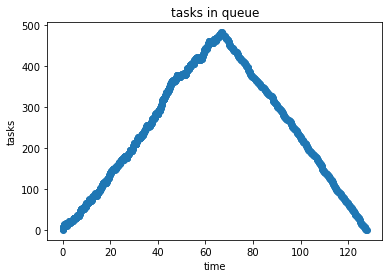

In [34]:
plt.title("tasks in queue")
plt.xlabel("time")
plt.ylabel("tasks")
#plt.rcParams['figure.figsize'] = [10, 10]
plt.plot([x[0] for x in tasks_in_queue], [x[1] for x in tasks_in_queue])
plt.scatter([x[0] for x in tasks_in_queue], [x[1] for x in tasks_in_queue])

<BarContainer object of 1000 artists>

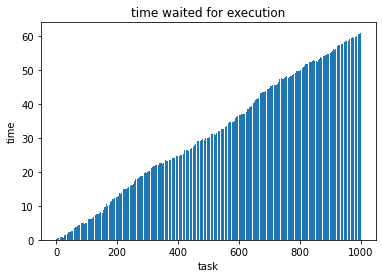

In [35]:
plt.title("time waited for execution")
plt.xlabel("task")
plt.ylabel("time")

plt.bar(range(n_of_tasks),time_waited)

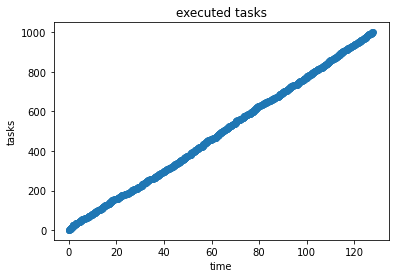

In [36]:
plt.title("executed tasks")
plt.xlabel("time")
plt.ylabel("tasks")
plt.scatter([x[0] for x in executed_tasks], [x[1] for x in executed_tasks])

In [37]:
temp = t
plot_a=[]
plot_b=[]
xs=[]
while(temp>0):
    plot_a.insert(0,(lambda_a-lambda_d)*temp)
    plot_b.insert(0,((lambda_a-lambda_d)/lambda_d)*temp)
    xs.insert(0,temp)
    temp-=1/60
    

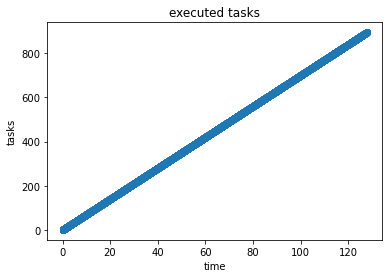

In [38]:
plt.title("executed tasks")
plt.xlabel("time")
plt.ylabel("tasks")
plt.scatter(xs,plot_a)

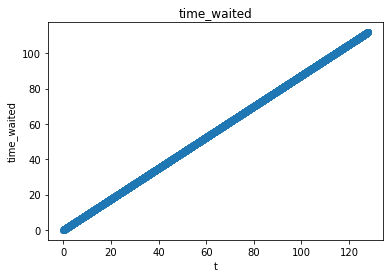

In [40]:
plt.title("time_waited")
plt.xlabel("t")
plt.ylabel("time_waited")
plt.scatter(xs,plot_b)